In [117]:
!pip install --upgrade pip
!pip install -r ../requirements.txt

In [118]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns
import pickle
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


In [119]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/dataset.csv')
# data dict: https://github.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/blob/main/Data-Dictionary.csv

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [121]:
df.isnull().values.any()

False

In [122]:
df.columns

Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop',
       ...
       'COPD_number', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'diabetes_number', 'CKD_prevalence',
       'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number',
       'Urban_rural_code'],
      dtype='object', length=108)

In [123]:
pd.options.display.max_columns=110
pd.options.display.max_rows=110
df.describe()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.00000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,1

In [124]:
df.describe(include='object')

,COUNTY_NAME,STATE_NAME
count,3140,3140
unique,1841,51
top,Washington,Texas
freq,31,254


In [125]:
df.sample(10)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
773,18157,193048,22620,11.717293,29295,15.174982,49274,25.524222,22609,11.711595,19288,9.991298,18583,9.626103,16501,8.547615,9307,4.821081,5571,2.885811,160526,83.153413,10921,5.657142,764,0.395756,16527,8.561083,107,0.055427,4203,2.177179,193048,1378,15858,12.1,6.2,5.9,7.4,-6.2,1.2,8638,26092,30267,39360,8.3,25.0,29.0,37.7,32114,18.1,14.7,13.6,52269,48477,56061,97693,94612,3081,3.2,52269,93.8,230.8,212.0,80.3,74.4,6.5,6.1,99.612507,24.376649,3.807950,75.899365,95.862253,251.151603,30,186081,28594,15.4,Tippecanoe,Indiana,18,157,153065,34.3,32.2,36.1,52468,28.2,26.7,29.6,43164,5.4,4.9,5.9,8250,6.9,5.9,8.0,10628,9.5,8.8,10.2,14474,2.4,2.2,2.6,3676,4
306,9001,943823,108385,11.483615,129955,13.769001,112617,11.932004,113230,11.996953,125353,13.281410,143173,15.169476,106677,11.302649,62683,6.641394,41750,4.423499,742641,78.684351,120100,12.724844,4887,0.517788,54887,5.815391,1019,0.107965,20289,2.149662,943823,366,19596,10.3,7.5,2.8,5.1,-7.6,-2.5,64890,139001,133981,303918,10.1,21.7,20.9,47.4,92971,10.0,12.7,12.2,91183,88535,93831,480767,461750,19017,4.0,91183,119.4,352.1,302.9,105.7,93.7,8.6,7.1,853.298109,427.969950,8.453727,1027.392058,206.852142,2275.901923,173,947328,197334,20.8,Fairfield,Connecticut,9,1,731785,31.7,30.0,33.4,231953,23.2,22.3,24.2,169774,5.5,4.9,6.1,40301,5.5,4.5,6.5,39898,8.6,7.9,9.3,62779,2.6,2.5,2.8,19329,3
839,19105,20744,2257,10.880255,2590,12.485538,2179,

In [126]:
df['fips'].nunique()

3140

## EDA

In [127]:
# Analisis de posibles target variables: ICU Beds_x, Active Physicians per 100000 Population 2018 (AAMC), Internal Medicine Primary Care (2019)

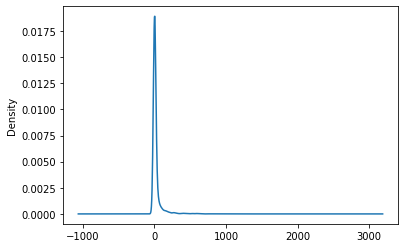

In [128]:
df['ICU Beds_x'].plot(kind='kde')
plt.show()

In [129]:
df['ICU Beds_x'].describe()

count    3140.000000
mean       23.817516
std        84.602028
min         0.000000
25%         0.000000
50%         0.000000
75%        12.000000
max      2126.000000
Name: ICU Beds_x, dtype: float64

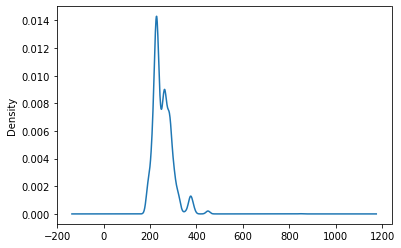

In [130]:
df['Active Physicians per 100000 Population 2018 (AAMC)'].plot(kind='kde')
plt.show()

In [131]:
df['Active Physicians per 100000 Population 2018 (AAMC)'].describe()

count    3140.000000
mean      254.923567
std        42.291759
min       191.300000
25%       227.600000
50%       247.100000
75%       278.800000
max       847.000000
Name: Active Physicians per 100000 Population 2018 (AAMC), dtype: float64

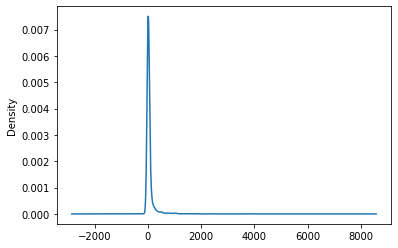

In [132]:
df['Internal Medicine Primary Care (2019)'].plot(kind='kde')
plt.show()

Todas presentan distribuciones con sesgo positivo

In [133]:
df['Internal Medicine Primary Care (2019)'].describe()

count    3140.000000
mean       62.898806
std       214.737693
min         0.046773
25%         4.843825
50%        12.386405
75%        36.902489
max      5713.007608
Name: Internal Medicine Primary Care (2019), dtype: float64

Text(0.5, 1.0, 'Internal Medicine Primary Care (2019)')

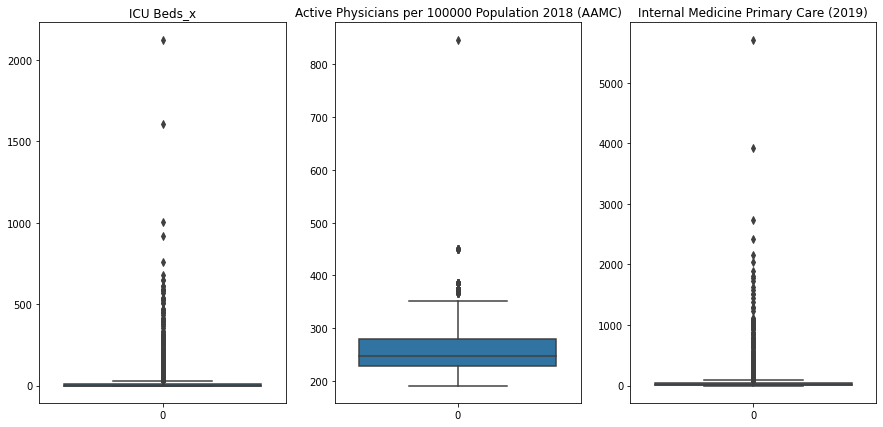

In [134]:
fig, axes = plt.subplots(1,3,figsize=(15, 7))

sns.boxplot(data=df['ICU Beds_x'],ax=axes[0])
axes[0].set_title('ICU Beds_x')

sns.boxplot(data=df['Active Physicians per 100000 Population 2018 (AAMC)'],ax=axes[1])
axes[1].set_title('Active Physicians per 100000 Population 2018 (AAMC)')

sns.boxplot(data=df['Internal Medicine Primary Care (2019)'],ax=axes[2])
axes[2].set_title('Internal Medicine Primary Care (2019)')

# Analisis de posibles target variables: ICU Beds_x, Active Physicians per 100000 Population 2018 (AAMC), Internal Medicine Primary Care (2019)

In [135]:
def correlation(feature):
    fig, axes = plt.subplots(1,3,figsize=(25, 7))

    sns.scatterplot(data=df.sample(300), x=feature, y='ICU Beds_x',ax=axes[0])
    axes[0].set_title('ICU Beds_x vs ' + feature)

    sns.scatterplot(data=df.sample(300), x=feature, y='Active Physicians per 100000 Population 2018 (AAMC)',ax=axes[1])
    axes[1].set_title('Active Physicians per 100000 Population 2018 (AAMC) vs ' + feature)

    sns.scatterplot(data=df.sample(300), x=feature, y='Internal Medicine Primary Care (2019)',ax=axes[2])
    axes[2].set_title('Internal Medicine Primary Care (2019) vs ' + feature)

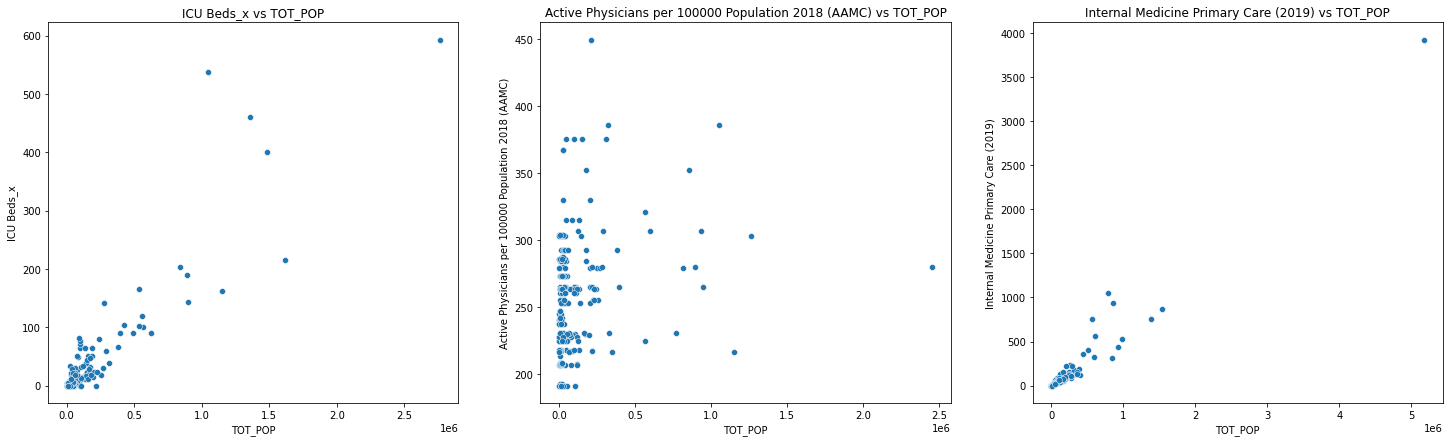

In [136]:
#Correlacion con poblacion total

correlation('TOT_POP')

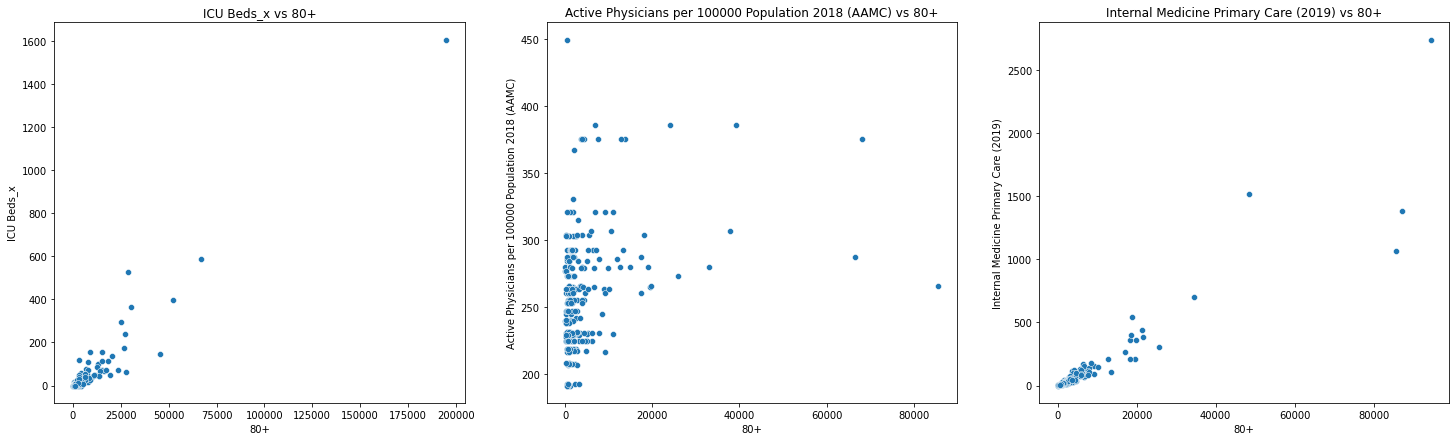

In [137]:
#Correlacion con mayores de 80

correlation('80+')

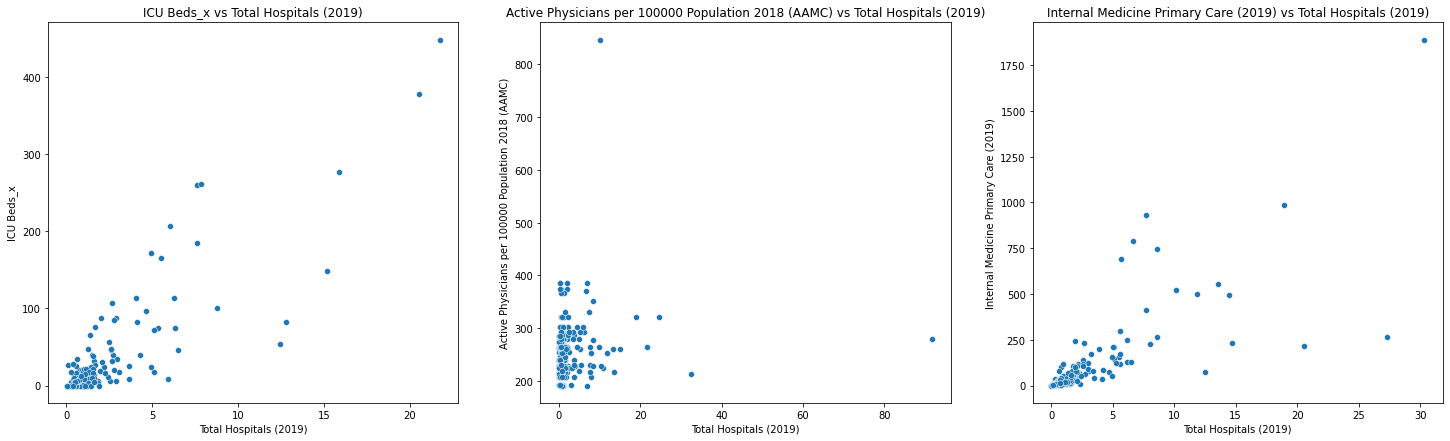

In [138]:
#Correlacion con Total Hospitals (2019)

correlation('Total Hospitals (2019)')

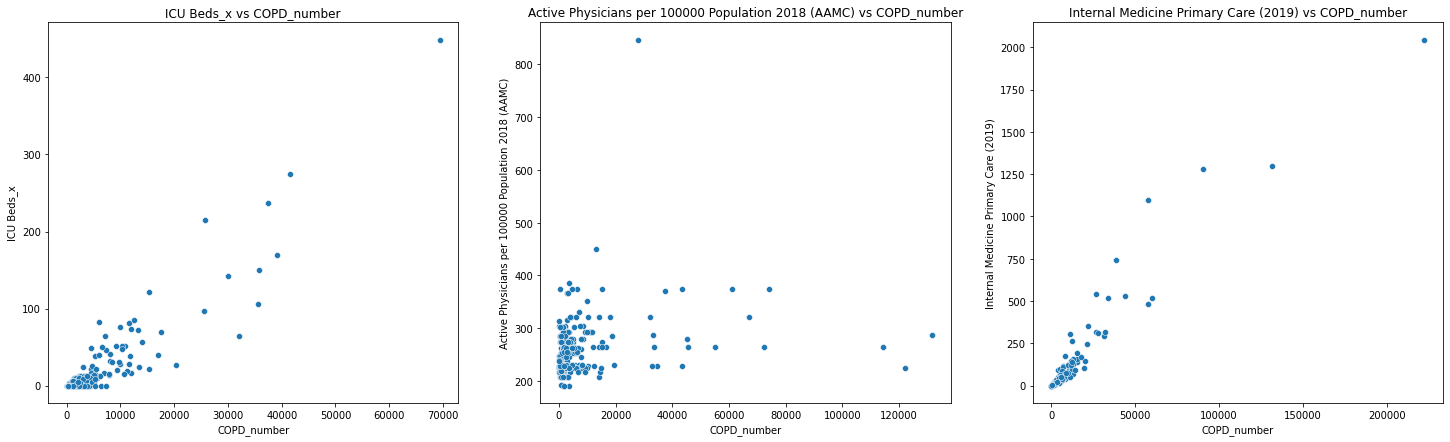

In [139]:
#Correlacion con prevalencia de epoc

correlation('COPD_number')

In [140]:
df.corr()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
fips,1.000000,-0.056079,-0.049580,-0.010586,-0.053130,0.018994,-0.053591,-0.030310,-0.051715,-0.045491,-0.054239,-0.051777,-0.057730,-0.007890,-0.060851,0.036143,-0.070460,0.040678,-0.069895,0.039802,-0.052099,0.137095,-0.041127,-0.130194,-0.064405,-0.001718,-0.061055,-0.076854,-0.055792,-0.048134,-0.069552,-0.049813,-0.056079,-0.020355,-0.056912,-0.034638,-0.017157,-0.010067,0.043293,0.036635,0.045086,-0.056196,-0.052330,-0.063897,-0.052762,-0.004694,0.003130,-0.054556,0.030866,-0.053726,-0.086429,-0.094407,-0.098582,0.042657,0.039818,0.045038,-0.054097,-0.053902,-0.057558,-0.105372,0.042657,0.011284,0.075255,0.061215,0.012989,-0.014039,0.126417,0.104767,-0.059903,-0.038218,-0.030419,-0.055315,-0.047988,-0.050077,-0.052409,-0.056233,-0.065207,0.047686,0.999975,0.172777,-0.057449,0.028766,0.024075,0.033331,-0.052585,0.084044,0.079244,0.088737,-0.046061,0.007443,0.001159,0.012330,-0.060668,-0.075188,-0.082630,-0.069494,-0.063463,-0.031057,-0.036327,-0.026483,-0.056055,-0.040631,-0.044576,-0.033649,-0.062322,-0.008345
TOT_POP,-0.056079,1.000000,0.994010,0.052507,0.994596,0.023384,0.994558,0.160254,0.995526,0.295635,0.998031,0.184424,0.997000,-0.092164,0.993624,-0.215300,0.980942,-0.207271,0.970889,-0.175148,0.988500,-0.153597,0.798709,0.087330,0.748573,-0.043600,0.840339,0.476078,0.478293,0.033349,0.898469,0.123643,1.000000,0.446357,0.889263,0.081277,-0.202414,0.184506,0.272763,0.001055,0.052902,0.947348

Se aplica LASSO usando como target la 'ICU Beds_x' por un lado y 'Internal Medicine Primary Care (2019)' por otro.

In [141]:
names = df[['fips', 'COUNTY_NAME', 'STATE_NAME']]

targets = df[['ICU Beds_x','Internal Medicine Primary Care (2019)']]

# De X se le sacan todas las variables relacionadas con salud
df.drop(['CNTY_FIPS','fips','Active Physicians per 100000 Population 2018 (AAMC)','Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)', 'Active Primary Care Physicians per 100000 Population 2018 (AAMC)', 'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)','Active General Surgeons per 100000 Population 2018 (AAMC)','Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)','Total nurse practitioners (2019)','Total physician assistants (2019)','Total physician assistants (2019)','Total Hospitals (2019)','Internal Medicine Primary Care (2019)','Family Medicine/General Practice Primary Care (2019)','STATE_NAME','COUNTY_NAME','ICU Beds_x','Total Specialist Physicians (2019)'], axis=1, inplace=True)

In [142]:
X = df
y1 = targets['ICU Beds_x']
y2=  targets['Internal Medicine Primary Care (2019)']

Con ICU Beds_x

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.3, random_state=42)

In [144]:
pipeline1 = make_pipeline(StandardScaler(), Lasso(alpha=5))
pipeline1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=5))])

In [145]:
coef_list=pipeline1[1].coef_
loc=[i for i, e in enumerate(coef_list) if e != 0]
col_name=df.columns
col_name[loc]

Index(['Black-alone pop', 'GQ_ESTIMATES_2018',
       'Bachelor's degree or higher 2014-18', 'COPD_number'],
      dtype='object')

In [146]:
print("Score Lasso - train: ", pipeline1.score(X_train, y_train))
print("Score Lasso - test: ", pipeline1.score(X_test, y_test))  

Score Lasso - train:  0.8855353278902658
Score Lasso - test:  0.7922341928072475


In [147]:
X_ols = X_train[col_name[loc]]

X_ols_int = sm.add_constant(X_ols) 

ols_model1 = sm.OLS(y_train, X_ols_int)

results = ols_model1.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ICU Beds_x   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     4387.
Date:                Sun, 31 Jul 2022   Prob (F-statistic):               0.00
Time:                        23:44:07   Log-Likelihood:                -10646.
No. Observations:                2198   AIC:                         2.130e+04
Df Residuals:                    2193   BIC:                         2.133e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -4.2929      0.726     -5.915      0.000      -5.716      -2.870
Black-alone pop                         0.0002   1.94e-05     12.542      0.000       0.000       0.000
GQ_ESTIMATES_2018                       0.0025      0.000     11.447      0.000       0.002       0.003
Bachelor's degree or higher 2014-18     0.0002   2.44e-05      6.508      0.000       0.000       0.000
COPD_number                             0.0026      0.000     19.695      0.000       0.002       0.003
==============================================================================
Omnibus:                     1908.369   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           529613.748
Skew:                           3.233   Prob(JB):                         0.00
Kurtosis:                      78.770   Cond. No.                     1.18e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Con Internal Medicine Primary Care (2019)

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.3, random_state=42)

In [149]:
pipeline2 = make_pipeline(StandardScaler(), Lasso(alpha=5))
pipeline2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=5))])

In [150]:
coef_list=pipeline2[1].coef_
loc=[i for i, e in enumerate(coef_list) if e != 0]
col_name=df.columns
col_name[loc]

Index(['50-59 y/o % of total pop', '80+', 'Black-alone pop', 'N_POP_CHG_2018',
       'GQ_ESTIMATES_2018', 'High school diploma only 2014-18',
       'Bachelor's degree or higher 2014-18', 'CI90LBINC_2018'],
      dtype='object')

In [151]:
print("Score Lasso - train: ", pipeline2.score(X_train, y_train))
print("Score Lasso - test: ", pipeline2.score(X_test, y_test))  

Score Lasso - train:  0.946195321189927
Score Lasso - test:  0.9013229633042815


In [152]:
X_ols = X_train[col_name[loc]]

X_ols_int = sm.add_constant(X_ols) 

ols_model2 = sm.OLS(y_train, X_ols_int)

results = ols_model2.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                     
=================================================================================================
Dep. Variable:     Internal Medicine Primary Care (2019)   R-squared:                       0.949
Model:                                               OLS   Adj. R-squared:                  0.948
Method:                                    Least Squares   F-statistic:                     5056.
Date:                                   Sun, 31 Jul 2022   Prob (F-statistic):               0.00
Time:                                           23:44:08   Log-Likelihood:                -11817.
No. Observations:                                   2198   AIC:                         2.365e+04
Df Residuals:                                       2189   BIC:                         2.370e+04
Df Model:                                              8                                         
Covariance Type:                               nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                 -75.1587     11.149     -6.742      0.000     -97.022     -53.296
50-59 y/o % of total pop                3.0759      0.788      3.901      0.000       1.530       4.622
80+                                     0.0051      0.001      8.617      0.000       0.004       0.006
Black-alone pop                         0.0003    3.9e-05      8.647      0.000       0.000       0.000
N_POP_CHG_2018                         -0.0065      0.000    -15.549      0.000      -0.007      -0.006
GQ_ESTIMATES_2018                       0.0058      0.000     14.494      0.000       0.005       0.007
High school diploma only 2014-18        0.0006      0.000      4.526      0.000       0.000       0.001
Bachelor's degree or higher 2014-18     0.0009   5.38e-05     17.023      0.000       0.001       0.001
CI90LBINC_2018                          0.0006   9.33e-05      6.467      0.000       0.000       0.001
==============================================================================
Omnibus:                     2779.192   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1102811.171
Skew:                           6.392   Prob(JB):                         0.00
Kurtosis:                     111.987   Cond. No.                     1.21e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [153]:
filename='../models/lasso_model1.sav'
pickle.dump(pipeline1, open(filename, 'wb'))

filename='../models/lasso_model2.sav'
pickle.dump(pipeline2, open(filename, 'wb'))

In [154]:
filename='../models/ols_model1.sav'
pickle.dump(ols_model1, open(filename, 'wb'))

filename='../models/ols_model2.sav'
pickle.dump(ols_model2, open(filename, 'wb'))